<a href="https://colab.research.google.com/github/kishore145/AI-ML-Foundations/blob/master/Neural%20Networks/06_deep_convoluted_neural_network_in_tensorflow_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dropout

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical



In [0]:
# Load data
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
# Check the shape of the data to ensure data is downloaded correctly
print(f'''
X_train shape: {X_train.shape},
y_train shape: {y_train.shape},
X_valid shape: {X_valid.shape},
y_valid shape: {y_valid.shape}''')


X_train shape: (60000, 28, 28),
y_train shape: (60000,),
X_valid shape: (10000, 28, 28),
y_valid shape: (10000,)


In [0]:
# Preprocess data - Input to conv is a 4D tensor with shape (batch_size, rows, cols, channels) as default which can be changed by data_format, 
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')

In [0]:
X_train /= 255
X_valid /= 255

In [6]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

# Review the revised shape of feature vector and target labels
print(f'''
X_train shape : {X_train.shape},
X_valid shape : {X_valid.shape},
y_train shape : {y_train.shape},
y_valid shape : {y_valid.shape} ''')


X_train shape : (60000, 28, 28, 1),
X_valid shape : (10000, 28, 28, 1),
y_train shape : (60000, 10),
y_valid shape : (10000, 10) 


In [0]:
# Design CNN Network with two conv layers, one max pooling layer and a flatten layer
# Create model
model = Sequential()

# Add first conv layer
# Some of the parameters are optional, but given in second line for reference
model.add(Conv2D(filters = 32,  kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1),
                 strides=(1,1), padding = "valid"))

# Add second conv layer with max pooling and dropout. 
# Flatten the o/p obtained for feeding into dense layer
model.add(Conv2D(filters = 64,  kernel_size = (3,3), activation = 'relu', 
                 strides=(1,1), padding = "valid"))
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=(2,2), padding = 'valid'))
model.add(Dropout(0.25))
model.add(Flatten())

# Add dense  layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add output softmax layer
model.add(Dense(n_classes, activation='softmax'))


In [8]:
# Review model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
# Compile model
model.compile(optimizer='nadam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
# Fit model - Storing the o/p of model.fit method into variable hist for plotting training/validation accuracy and loss
hist = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2321 - accuracy: 0.9306 - val_loss: 0.0592 - val_accuracy: 0.9798
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0821 - accuracy: 0.9760 - val_loss: 0.0446 - val_accuracy: 0.9847
Epoch 3/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0572 - accuracy: 0.9828 - val_loss: 0.0341 - val_accuracy: 0.9893
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0297 - val_accuracy: 0.9909
Epoch 5/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0288 - val_accuracy: 0.9909
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0364 - accuracy: 0.9881 - val_loss: 0.0287 - val_accuracy: 0.9912
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0281 - val_accuracy: 0.9913
Ep

In [11]:
model.evaluate(X_valid, y_valid, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0349 - accuracy: 0.9925


[0.03485826030373573, 0.9925000071525574]

Text(0, 0.5, 'accuracy')

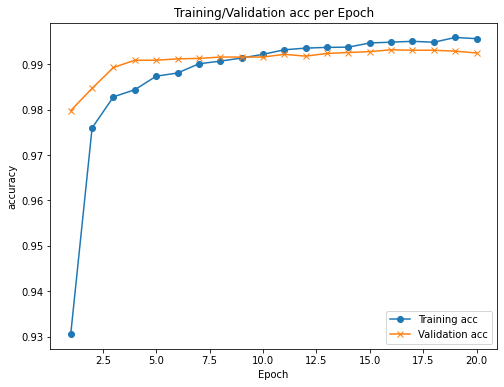

In [12]:
# Plotting variation in acccuracy over epochs
# You can see overfitting happening in the graph
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (8,6))
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Training acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy') 


Text(0, 0.5, 'loss')

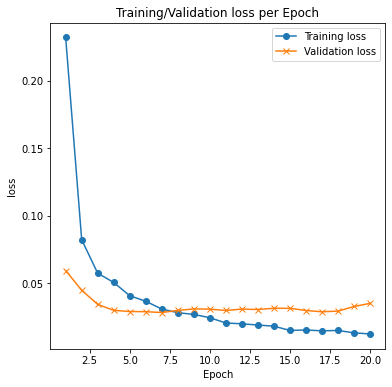

In [13]:
# Plotting variation in loss over epochs
# You can see overfitting happening in the graph

f, ax = plt.subplots(figsize = (6,6))
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Training loss', 'Validation loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss') 

In [0]:
# Concludes Deep CNN architecture based on JonKrohn's lecture with added section:
# visualization of loss/accuracy varation against epochs for better understanding